In [1]:
import yfinance as yf
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
xrp_1hr = yf.download(tickers='XRP-USD', start='2019-09-01', interval='1h')
xrp_1hr.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
xrp_1hr.reset_index(inplace = True)
xrp_1hr.rename(columns = {'index' : "Datetime"}, inplace = True)
xrp_1hr.set_index(pd.to_datetime(xrp_1hr['Datetime'], infer_datetime_format=True), inplace=True)
xrp_1hr.drop(columns = 'Datetime', inplace = True)
xrp_1hr

[*********************100%***********************]  1 of 1 completed


,Close
Datetime,
2019-09-01 01:00:00+01:00,0.259100
2019-09-01 02:00:00+01:00,0.258400
2019-09-01 03:00:00+01:00,0.257800
2019-09-01 04:00:00+01:00,0.258500
2019-09-01 05:00:00+01:00,0.258100
...,...
2021-08-10 23:00:00+01:00,0.855940
2021-08-11 00:00:00+01:00,0.851247
2021-08-11 01:00:00+01:00,0.869300


In [3]:
# Drop NAs and calculate daily percent return
xrp_1hr['daily_return'] = xrp_1hr['Close'].dropna().pct_change()
xrp_1hr

,Close,daily_return
Datetime,,
2019-09-01 01:00:00+01:00,0.259100,NaN
2019-09-01 02:00:00+01:00,0.258400,-0.002702
2019-09-01 03:00:00+01:00,0.257800,-0.002322
2019-09-01 04:00:00+01:00,0.258500,0.002715
2019-09-01 05:00:00+01:00,0.258100,-0.001547
...,...,...
2021-08-10 23:00:00+01:00,0.855940,-0.003301
2021-08-11 00:00:00+01:00,0.851247,-0.005484
2021-08-11 01:00:00+01:00,0.869300,0.021208


In [4]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp_1hr['fast_close'] = xrp_1hr['Close'].ewm(halflife=short_window).mean()
xrp_1hr['slow_close'] = xrp_1hr['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
xrp_1hr['crossover_long'] = np.where(xrp_1hr['fast_close'] > xrp_1hr['slow_close'], 1.0, 0.0)
xrp_1hr['crossover_short'] = np.where(xrp_1hr['fast_close'] < xrp_1hr['slow_close'], -1.0, 0.0)
xrp_1hr['crossover_signal'] = xrp_1hr['crossover_long'] + xrp_1hr['crossover_short']

xrp_1hr.head()

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Datetime,,,,,,,
2019-09-01 01:00:00+01:00,0.2591,NaN,0.259100,0.259100,0.0,0.0,0.0
2019-09-01 02:00:00+01:00,0.2584,-0.002702,0.258633,0.258738,0.0,-1.0,-1.0
2019-09-01 03:00:00+01:00,0.2578,-0.002322,0.258157,0.258403,0.0,-1.0,-1.0
2019-09-01 04:00:00+01:00,0.2585,0.002715,0.258340,0.258430,0.0,-1.0,-1.0
2019-09-01 05:00:00+01:00,0.2581,-0.001547,0.258216,0.258355,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Datetime'>

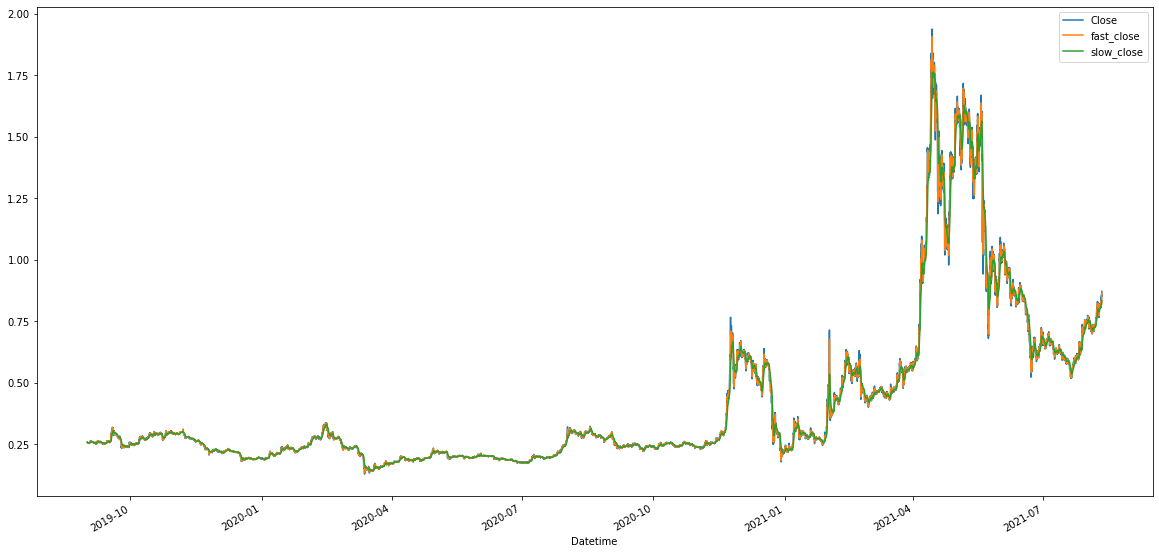

In [5]:
# Plot the EMA of XRP/USD closing prices
xrp_1hr[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [6]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
xrp_1hr['fast_vol'] = xrp_1hr['daily_return'].ewm(halflife=short_vol_window).std()
xrp_1hr['slow_vol'] = xrp_1hr['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
xrp_1hr['vol_trend_long'] = np.where(xrp_1hr['fast_vol'] < xrp_1hr['slow_vol'], 1.0, 0.0)
xrp_1hr['vol_trend_short'] = np.where(xrp_1hr['fast_vol'] > xrp_1hr['slow_vol'], -1.0, 0.0) 
xrp_1hr['vol_trend_signal'] = xrp_1hr['vol_trend_long'] + xrp_1hr['vol_trend_short']

xrp_1hr

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Datetime,,,,,,,,,,,,
2019-09-01 01:00:00+01:00,0.259100,NaN,0.259100,0.259100,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2019-09-01 02:00:00+01:00,0.258400,-0.002702,0.258633,0.258738,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0
2019-09-01 03:00:00+01:00,0.257800,-0.002322,0.258157,0.258403,0.0,-1.0,-1.0,0.000269,0.000269,0.0,-1.0,-1.0
2019-09-01 04:00:00+01:00,0.258500,0.002715,0.258340,0.258430,0.0,-1.0,-1.0,0.003384,0.003071,0.0,-1.0,-1.0
2019-09-01 05:00:00+01:00,0.258100,-0.001547,0.258216,0.258355,0.0,-1.0,-1.0,0.002567,0.002507,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 23:00:00+01:00,0.855940,-0.003301,0.851644,0.824693,1.0,0.0,1.0,0.011736,0.012083,1.0,0.0,1.0
2021-08-11 00:00:00+01:00,0.851247,-0.005484,0.851445,0.826471,1.0,0.0,1.0,0.010553,0.011858,1.0,0.0,1.0
2021-08-11 01:00:00+01:00,0.869300,0.021208,0.860372,0.829339,1.0,0.0,1.0,0.015064,0.012432,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Datetime'>

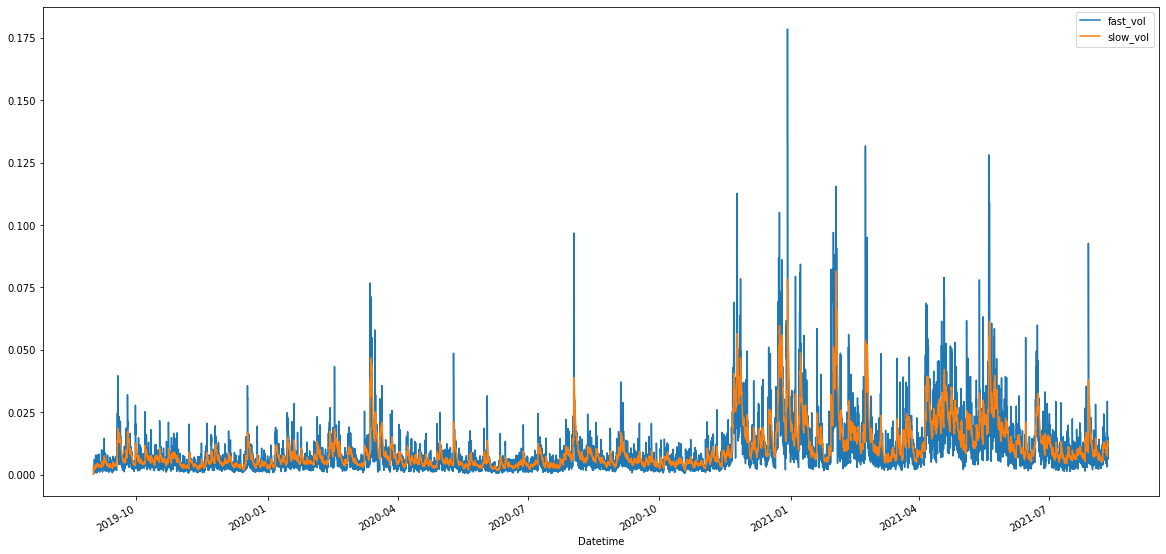

In [7]:
# Plot the EMA of BTC/USD daily return volatility
xrp_1hr[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [8]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
xrp_1hr['bollinger_mid_band'] = xrp_1hr['Close'].rolling(window=bollinger_window).mean()
xrp_1hr['bollinger_std'] = xrp_1hr['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
xrp_1hr['bollinger_upper_band']  = xrp_1hr['bollinger_mid_band'] + (xrp_1hr['bollinger_std'] * 1)
xrp_1hr['bollinger_lower_band']  = xrp_1hr['bollinger_mid_band'] - (xrp_1hr['bollinger_std'] * 1)

# Calculate bollinger band trading signal
xrp_1hr['bollinger_long'] = np.where(xrp_1hr['Close'] < xrp_1hr['bollinger_lower_band'], 1.0, 0.0)
xrp_1hr['bollinger_short'] = np.where(xrp_1hr['Close'] > xrp_1hr['bollinger_upper_band'], -1.0, 0.0)
xrp_1hr['bollinger_signal'] = xrp_1hr['bollinger_long'] + xrp_1hr['bollinger_short']

xrp_1hr

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Datetime,,,,,,,,,,,,,,,,,,,
2019-09-01 01:00:00+01:00,0.259100,NaN,0.259100,0.259100,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-01 02:00:00+01:00,0.258400,-0.002702,0.258633,0.258738,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-01 03:00:00+01:00,0.257800,-0.002322,0.258157,0.258403,0.0,-1.0,-1.0,0.000269,0.000269,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-01 04:00:00+01:00,0.258500,0.002715,0.258340,0.258430,0.0,-1.0,-1.0,0.003384,0.003071,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-09-01 05:00:00+01:00,0.258100,-0.001547,0.258216,0.258355,0.0,-1.0,-1.0,0.002567,0.002507,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 23:00:00+01:00,0.855940,-0.003301,0.851644,0.824693,1.0,0.0,1.0,0.011736,0.012083,1.0,0.0,1.0,0.825660,0.015839,0.841499,0.809821,0.0,-1.0,-1.0
2021-08-11 00:00:00+01:00,0.851247,-0.005484,0.851445,0.826471,1.0,0.0,1.0,0.010553,0.011858,1.0,0.0,1.0,0.828001,0.015995,0.843996,0.812005,0.0,-1.0,-1.0
2021-08-11 01:00:00+01:00,0.869300,0.021208,0.860372,0.829339,1.0,0.0,1.0,0.015064,0.012432,0.0,-1.0,-1.0,0.830971,0.017863,0.848834,0.813108,0.0,-1.0,-1.0


<AxesSubplot:xlabel='Datetime'>

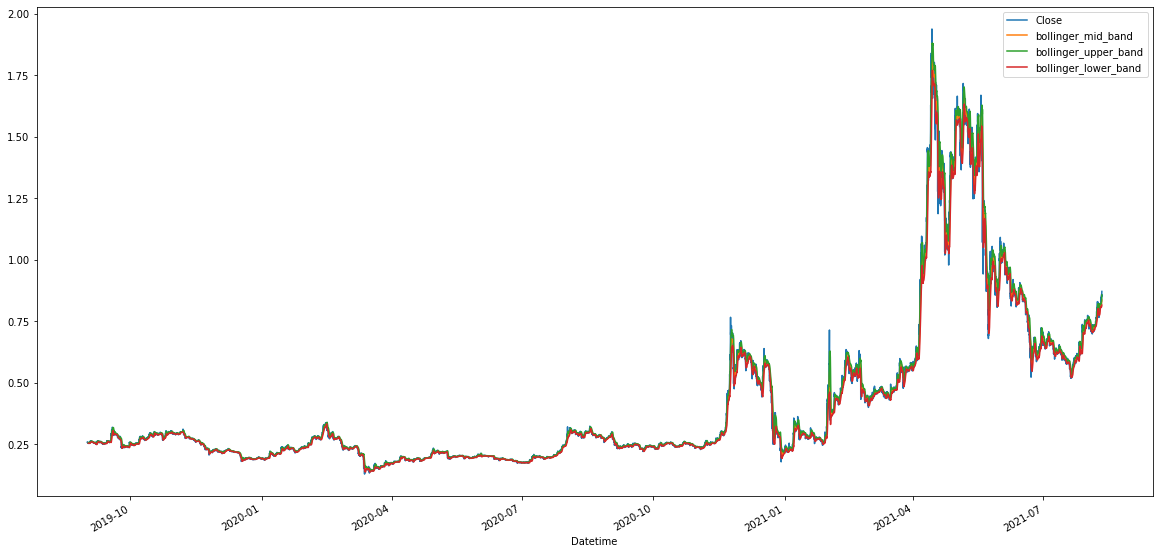

In [9]:
# Plot the Bollinger Bands for BTC/USD closing prices
xrp_1hr[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [10]:
# MACD 
!pip install pandas_ta
import pandas_ta as ta

     |████████████████████████████████| 115 kB 27.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3ea72c43fba36d2f7dedb79fb3c00e158b01a40750875bbb47633593d0a6c3f5
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
# Calculate MACD values using the pandas_ta library
xrp_1hr.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
xrp_1hr

,Close,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,...,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-09-01 01:00:00+01:00,0.259100,NaN,0.259100,0.259100,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-01 02:00:00+01:00,0.258400,-0.002702,0.258633,0.258738,0.0,-1.0,-1.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-01 03:00:00+01:00,0.257800,-0.002322,0.258157,0.258403,0.0,-1.0,-1.0,0.000269,0.000269,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-01 04:00:00+01:00,0.258500,0.002715,0.258340,0.258430,0.0,-1.0,-1.0,0.003384,0.003071,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-09-01 05:00:00+01:00,0.258100,-0.001547,0.258216,0.258355,0.0,-1.0,-1.0,0.002567,0.002507,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 23:00:00+01:00,0.855940,-0.003301,0.851644,0.824693,1.0,0.0,1.0,0.011736,0.012083,1.0,...,0.825660,0.015839,0.841499,0.809821,0.0,-1.0,-1.0,0.009501,0.003076,0.006425
2021-08-11 00:00:00+01:00,0.851247,-0.005484,0.851445,0.826471,1.0,0.0,1.0,0.010553,0.011858,1.0,...,0.828001,0.015995,0.843996,0.812005,0.0,-1.0,-1.0,0.010046,0.002897,0.007149
2021-08-11 01:00:00+01:00,0.869300,0.021208,0.860372,0.829339,1.0,0.0,1.0,0.015064,0.012432,0.0,...,0.830971,0.017863,0.848834,0.813108,0.0,-1.0,-1.0,0.011799,0.003720,0.008079


In [12]:
#!pip install termcolor
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [13]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

xrp_macd = get_macd(xrp_1hr['Close'], 26, 12, 9)
xrp_macd.tail()

,macd,signal,hist
Datetime,,,
2021-08-10 23:00:00+01:00,0.009501,0.006425,0.003076
2021-08-11 00:00:00+01:00,0.010046,0.007149,0.002897
2021-08-11 01:00:00+01:00,0.011799,0.008079,0.003720
2021-08-11 02:00:00+01:00,0.013200,0.009103,0.004097
2021-08-11 02:52:03+01:00,0.014188,0.010120,0.004068


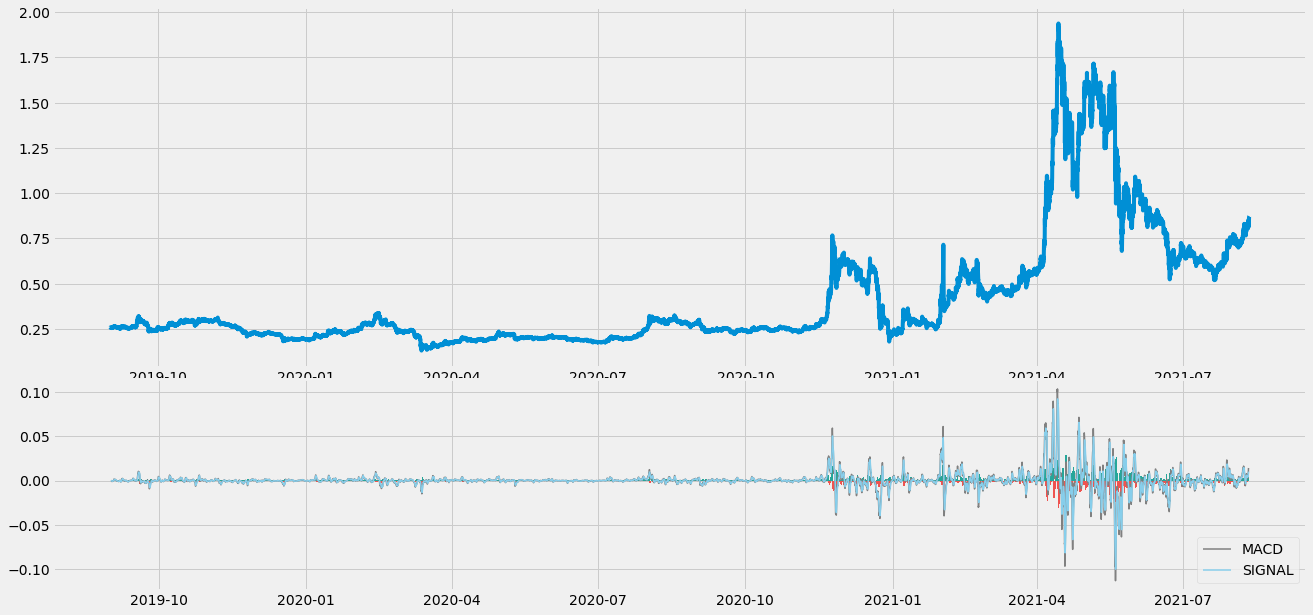

In [14]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(xrp_1hr['Close'], xrp_macd['macd'], xrp_macd['signal'], xrp_macd['hist'])

In [15]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(xrp_1hr['Close'], xrp_macd)

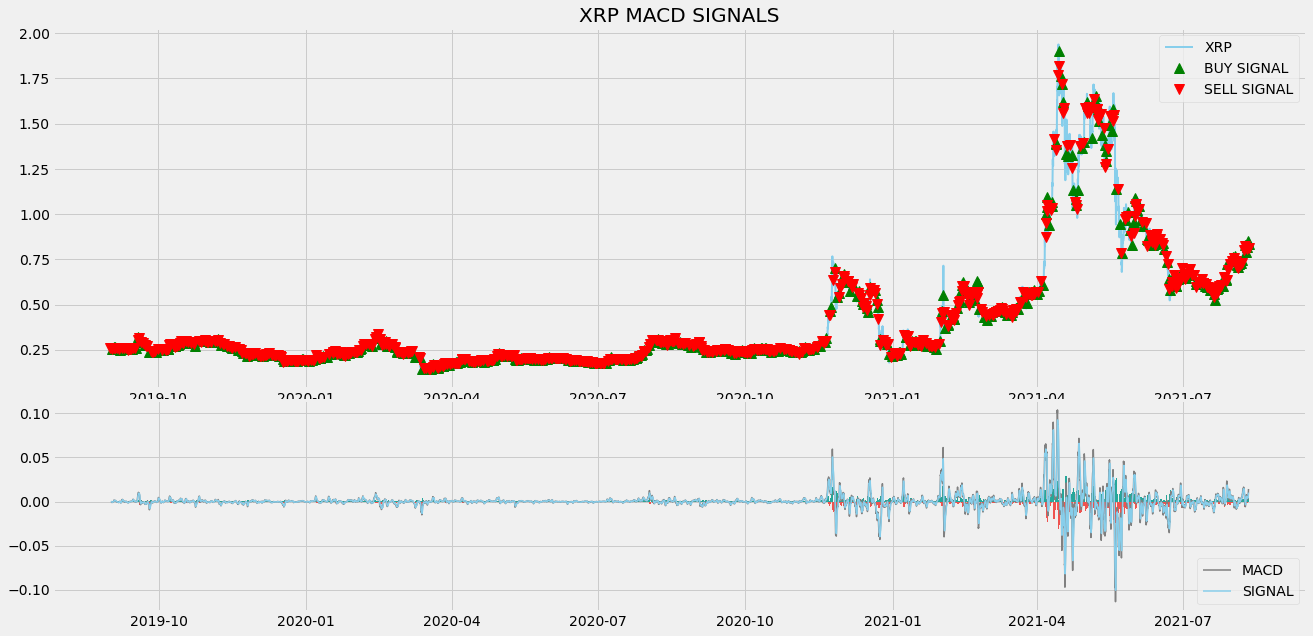

In [16]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(xrp_1hr['Close'], color = 'skyblue', linewidth = 2, label = 'XRP')
ax1.plot(xrp_1hr.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(xrp_1hr.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('XRP MACD SIGNALS')
ax2.plot(xrp_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(xrp_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(xrp_macd)):
    if str(xrp_macd['hist'][i])[0] == '-':
        ax2.bar(xrp_macd.index[i], xrp_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(xrp_macd.index[i], xrp_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [17]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(xrp_1hr['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = xrp_macd['macd']
signal = xrp_macd['signal']
close_price = xrp_1hr['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(xrp_1hr.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(xrp_1hr.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,macd,signal,macd_signal,macd_position
Datetime,,,,,
2019-09-01 01:00:00+01:00,0.259100,0.000000,0.000000,0,1
2019-09-01 02:00:00+01:00,0.258400,-0.000056,-0.000011,-1,0
2019-09-01 03:00:00+01:00,0.257800,-0.000147,-0.000038,0,0
2019-09-01 04:00:00+01:00,0.258500,-0.000161,-0.000063,0,0
2019-09-01 05:00:00+01:00,0.258100,-0.000201,-0.000090,0,0
...,...,...,...,...,...
2021-08-10 23:00:00+01:00,0.855940,0.009501,0.006425,0,1
2021-08-11 00:00:00+01:00,0.851247,0.010046,0.007149,0,1
2021-08-11 01:00:00+01:00,0.869300,0.011799,0.008079,0,1


In [18]:
strategy.to_csv('XRP_MACD_TRADE_STRATEGY')

In [19]:
xrp_ret = pd.DataFrame(np.diff(xrp_1hr['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(xrp_ret)):
    try:
        returns = xrp_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/xrp_1hr['Close'][-1])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in XRP : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in XRP : 103795.55
Profit percentage of the MACD strategy : 103%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>